<a href="https://colab.research.google.com/github/mayonaise01/DADS5001_Data_Product/blob/main/Data_Product_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
# import library
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
import seaborn as sns

# **Import Data**

In [306]:
df = pd.read_csv('https://raw.githubusercontent.com/mayonaise01/DADS5001_Data_Product/refs/heads/main/marketing_campaign.csv',sep="\t")

In [307]:
# Content
# Attributes

# People

# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level
# Marital_Status: Customer's marital status
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise
# Products

# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years
# Promotion

# NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
# Place

# NumWebPurchases: Number of purchases made through the company’s website
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to company’s website in the last month

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Clean Data**

In [309]:
df = df.dropna()

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

# **Explore Data**

In [311]:
df['Age'] = 2024 - df['Year_Birth']

In [312]:
# def ตรวจสอบ outlier
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    return outliers

In [313]:
# ตรวจสอบ outlier ที่ไม่ใช่ object
for feature in df.columns[2:]:
    if df.dtypes[feature] == 'object':
        continue
    else:
        outliers = detect_outliers_iqr(df[feature])
        print(f"Outliers in {feature}: {len(outliers)}")
        print(outliers)
        fig = px.box(df, y=feature)
        fig.show()

Outliers in Income: 8
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


Outliers in Kidhome: 0
Series([], Name: Kidhome, dtype: int64)


Outliers in Teenhome: 0
Series([], Name: Teenhome, dtype: int64)


Outliers in Recency: 0
Series([], Name: Recency, dtype: int64)


Outliers in MntWines: 35
111     1332
161     1349
295     1241
424     1285
430     1248
466     1239
497     1396
515     1288
523     1379
543     1478
559     1492
824     1492
826     1279
870     1308
917     1478
937     1253
987     1394
990     1296
1001    1285
1010    1230
1052    1315
1191    1298
1458    1302
1488    1449
1492    1259
1577    1252
1641    1459
1749    1493
1922    1324
1953    1285
1961    1462
1992    1276
2067    1245
2098    1486
2127    1311
Name: MntWines, dtype: int64


Outliers in MntFruits: 246
0        88
18       80
29      100
45      164
53      120
       ... 
2185    142
2194     80
2203    124
2206    129
2217    194
Name: MntFruits, Length: 246, dtype: int64


Outliers in MntMeatProducts: 174
21      1725
29       801
51       780
76       925
77       779
        ... 
2187     749
2190     655
2193     845
2211     860
2213     631
Name: MntMeatProducts, Length: 174, dtype: int64


Outliers in MntFishProducts: 222
0       172
12      225
17      150
39      160
45      227
       ... 
2188    199
2190    145
2193    202
2206    182
2217    149
Name: MntFishProducts, Length: 222, dtype: int64


Outliers in MntSweetProducts: 246
0        88
12      112
40      178
51      167
55      120
       ... 
2175     92
2190    111
2193    133
2217    125
2235    118
Name: MntSweetProducts, Length: 246, dtype: int64


Outliers in MntGoldProds: 205
18      176
45      174
53      241
55      190
62      169
       ... 
2178    227
2188    163
2194    174
2198    152
2235    247
Name: MntGoldProds, Length: 205, dtype: int64


Outliers in NumDealsPurchases: 84
21      15
24       7
49       9
54       7
69       7
        ..
2090     7
2144     7
2198     7
2226     8
2236     7
Name: NumDealsPurchases, Length: 84, dtype: int64


Outliers in NumWebPurchases: 3
1806    23
1898    27
1975    25
Name: NumWebPurchases, dtype: int64


Outliers in NumCatalogPurchases: 23
21      28
104     11
164     22
288     11
586     11
591     11
627     11
636     11
687     28
764     11
777     11
934     11
984     11
1212    11
1452    11
1465    11
1492    11
1653    28
1745    11
1828    11
1906    11
1940    11
1958    11
Name: NumCatalogPurchases, dtype: int64


Outliers in NumStorePurchases: 0
Series([], Name: NumStorePurchases, dtype: int64)


Outliers in NumWebVisitsMonth: 8
9       20
774     20
981     14
1042    19
1245    20
1328    17
1524    14
1846    19
Name: NumWebVisitsMonth, dtype: int64


Outliers in AcceptedCmp3: 163
9       1
39      1
53      1
67      1
77      1
       ..
2194    1
2197    1
2198    1
2224    1
2230    1
Name: AcceptedCmp3, Length: 163, dtype: int64


Outliers in AcceptedCmp4: 164
22      1
32      1
60      1
73      1
86      1
       ..
2185    1
2186    1
2207    1
2221    1
2237    1
Name: AcceptedCmp4, Length: 164, dtype: int64


Outliers in AcceptedCmp5: 162
15      1
29      1
55      1
60      1
88      1
       ..
2168    1
2171    1
2175    1
2187    1
2221    1
Name: AcceptedCmp5, Length: 162, dtype: int64


Outliers in AcceptedCmp1: 142
15      1
18      1
53      1
67      1
87      1
       ..
2168    1
2174    1
2175    1
2193    1
2236    1
Name: AcceptedCmp1, Length: 142, dtype: int64


Outliers in AcceptedCmp2: 30
252     1
295     1
342     1
417     1
430     1
559     1
575     1
804     1
822     1
824     1
845     1
870     1
920     1
990     1
1087    1
1237    1
1281    1
1308    1
1462    1
1641    1
1687    1
1710    1
1915    1
1922    1
1926    1
1961    1
2099    1
2125    1
2167    1
2171    1
Name: AcceptedCmp2, dtype: int64


Outliers in Complain: 21
78      1
147     1
192     1
271     1
355     1
358     1
590     1
972     1
1041    1
1069    1
1180    1
1201    1
1211    1
1277    1
1323    1
1461    1
1571    1
1720    1
1850    1
1924    1
2018    1
Name: Complain, dtype: int64


Outliers in Z_CostContact: 0
Series([], Name: Z_CostContact, dtype: int64)


Outliers in Z_Revenue: 0
Series([], Name: Z_Revenue, dtype: int64)


Outliers in Response: 333
0       1
8       1
15      1
33      1
39      1
       ..
2194    1
2198    1
2202    1
2221    1
2239    1
Name: Response, Length: 333, dtype: int64


Outliers in Age: 3
192    124
239    131
339    125
Name: Age, dtype: int64


In [314]:
# ดู outlier

outliers_income = detect_outliers_iqr(df['Income'])
print("Outliers in Income:", outliers_income)

fig = px.box(df, y="Income")
fig.show()

Outliers in Income: 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


In [315]:
# ตรวจสอบ ข้อมูลที่เป็น object

for feature in df.columns:
    if df.dtypes[feature] == 'object':
      fig = px.histogram(df, x=feature)
      fig.show()

# **Remove Outlier and Grouping Data**

In [316]:
# delete row ที่มี income มากกว่า 200000

df = df[df["Income"] <= 200000]

In [317]:
# Group by Marutal Status
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Couple')

print(df['Marital_Status'].unique())

['Single' 'Couple']


<ipython-input-317-f76d4c7b61e8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-317-f76d4c7b61e8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [318]:
# Group by Education

df['Education'] = df['Education'].replace(['PhD','Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')
df['Education'] = df['Education'].replace(['Graduation','2n Cycle'], 'Graduate')

print(df['Education'].unique())

['Graduate' 'Postgraduate' 'Undergraduate']


<ipython-input-318-8567861627cf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-318-8567861627cf>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-318-8567861627cf>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   object 
 3   Marital_Status       2215 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Dt_Customer          2215 non-null   object 
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   int64 

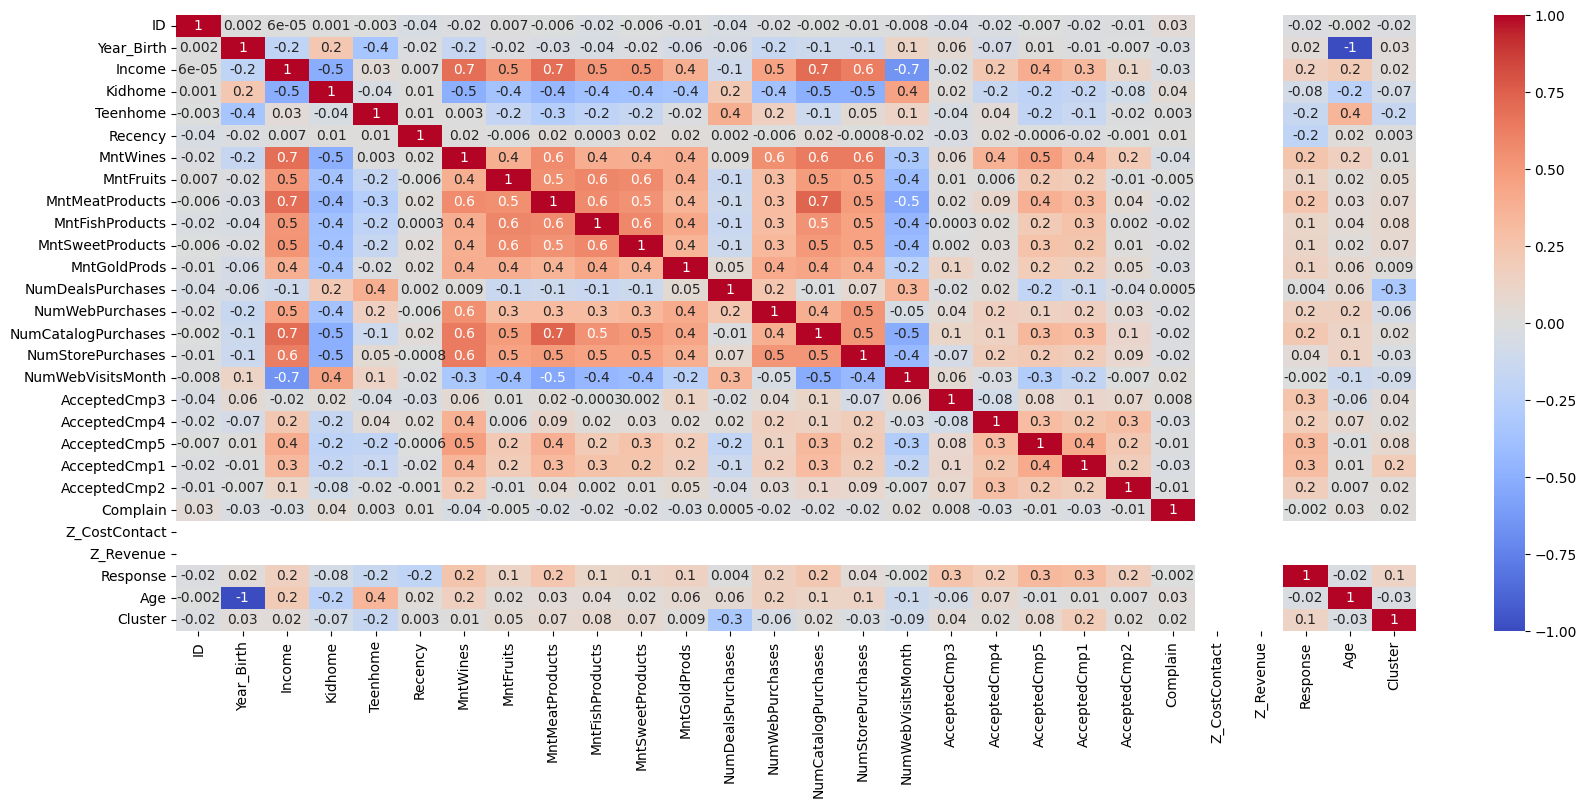

In [332]:
colors = ["#E2504A", "#EDEBEC", "#327D7C"]

corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(20,8))
sns.heatmap(data=corr_matrix, annot=True, color=colors, cmap='coolwarm', fmt=".1g")
plt.show()

In [320]:
# One-hot encode 'Education' and 'Marital_Status'
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2215 non-null   int64  
 1   Year_Birth               2215 non-null   int64  
 2   Income                   2215 non-null   float64
 3   Kidhome                  2215 non-null   int64  
 4   Teenhome                 2215 non-null   int64  
 5   Dt_Customer              2215 non-null   object 
 6   Recency                  2215 non-null   int64  
 7   MntWines                 2215 non-null   int64  
 8   MntFruits                2215 non-null   int64  
 9   MntMeatProducts          2215 non-null   int64  
 10  MntFishProducts          2215 non-null   int64  
 11  MntSweetProducts         2215 non-null   int64  
 12  MntGoldProds             2215 non-null   int64  
 13  NumDealsPurchases        2215 non-null   int64  
 14  NumWebPurchases          2215

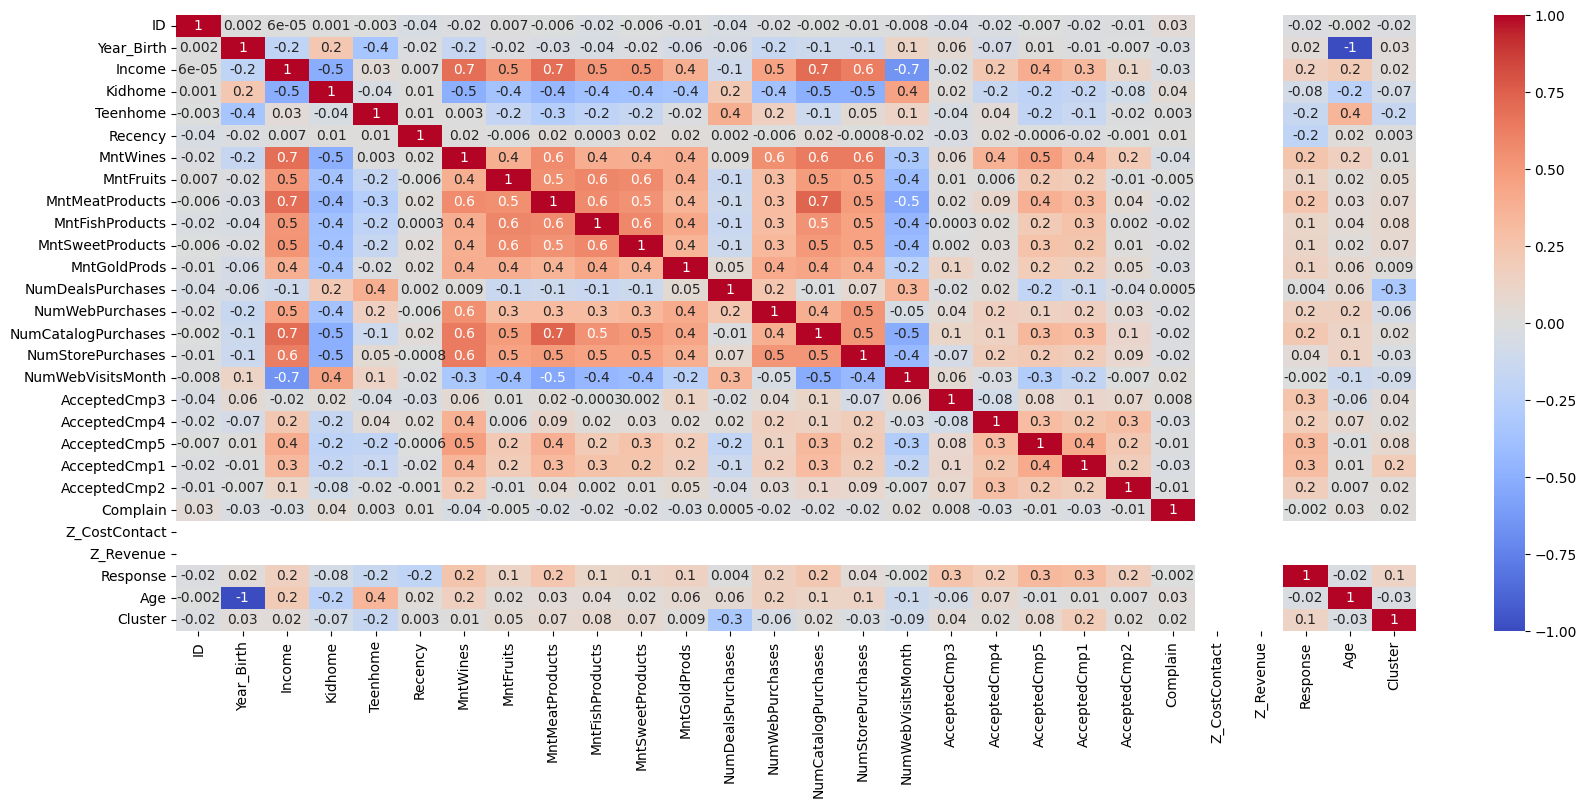

In [331]:
colors = ["#E2504A", "#EDEBEC", "#327D7C"]

corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(20,8))
sns.heatmap(data=corr_matrix, annot=True, color=colors, cmap='coolwarm', fmt=".1g")
plt.show()

In [322]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11] # 1<clusters< m

In [323]:
# Select features for K-means clustering
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# สร้างกราฟ Elbow Method
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range_n_clusters),  # แกน X เป็นจำนวน clusters
    y=inertia,  # แกน Y เป็น inertia
    mode='lines+markers',  # เส้นพร้อม marker
    marker=dict(size=10, color='blue'),  # ปรับขนาดและสี marker
    line=dict(color='blue', width=2)  # ปรับสีและความหนาเส้น
))

# เพิ่มชื่อแกนและชื่อกราฟ
fig.update_layout(
    title="Elbow Method for Optimal k",
    xaxis_title="Number of clusters",
    yaxis_title="Inertia",
    template="plotly_white"  # ธีมแบบขาวสะอาด
)

# แสดงกราฟ
fig.show()

In [324]:
# silhouette analysis

for k in range_n_clusters:
  clusterer = KMeans(n_clusters=k, random_state=10)
  cluster_labels = clusterer.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print(
      "For n_clusters =",
      k,
      "The average silhouette_score is :",
      silhouette_avg,
  )

For n_clusters = 2 The average silhouette_score is : 0.4798863529328558
For n_clusters = 3 The average silhouette_score is : 0.39948505832785725
For n_clusters = 4 The average silhouette_score is : 0.4036900927743438
For n_clusters = 5 The average silhouette_score is : 0.34789789462576026
For n_clusters = 6 The average silhouette_score is : 0.3117617683987502
For n_clusters = 7 The average silhouette_score is : 0.29705461992352494
For n_clusters = 8 The average silhouette_score is : 0.2834642112917925
For n_clusters = 9 The average silhouette_score is : 0.2730454216370531
For n_clusters = 10 The average silhouette_score is : 0.27475315278712065
For n_clusters = 11 The average silhouette_score is : 0.27296612354508476


In [325]:
# Based on the elbow method, choose the optimal number of clusters (e.g., k=2)
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Analyze the clusters
for i in range(k):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i][features].describe())

# Visualize the clusters (you can use different features for visualization)
fig = px.scatter(
    df,
    x='Income',  # แกน X
    y='MntWines',  # แกน Y
    color='Cluster',  # สีของจุดตามคลัสเตอร์
    color_continuous_scale='viridis',  # แผนสีเดียวกับ matplotlib
    title='K-means Clustering Results',
    labels={'Income': 'Income', 'MntWines': 'Amount spent on Wines'},  # ชื่อแกน
)

# ปรับแต่งเพิ่มเติม เช่น ขนาดกราฟ
fig.update_layout(
    xaxis_title='Income',
    yaxis_title='Amount spent on Wines',
    template='plotly_white'  # ธีมสะอาด
)

# แสดงกราฟ
fig.show()


Cluster 0:
              Income     MntWines    MntFruits  MntMeatProducts  \
count    1457.000000  1457.000000  1457.000000      1457.000000   
mean    40784.287577   146.494852     7.461222        46.139327   
std     15877.376150   213.019114    11.379145        53.267859   
min      1730.000000     0.000000     0.000000         0.000000   
25%     29760.000000    12.000000     1.000000        10.000000   
50%     40059.000000    44.000000     3.000000        24.000000   
75%     51569.000000   198.000000     9.000000        67.000000   
max    157733.000000  1241.000000   103.000000       382.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  
count      1457.000000       1457.000000   1457.000000  
mean         10.568977          7.394647     25.275223  
std          16.252247         11.455722     33.560453  
min           0.000000          0.000000      0.000000  
25%           2.000000          0.000000      5.000000  
50%           4.000000          3.000000  

In [326]:
# Select features1 for K-means clustering
features1 = ['Income', 'Education_Postgraduate','Education_Undergraduate','Marital_Status_Single','Recency','NumDealsPurchases','AcceptedCmp1']
X = df[features1]

# Standardize the features
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled1)
    inertia.append(kmeans.inertia_)

# สร้างกราฟ Elbow Method
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range_n_clusters),  # แกน X เป็นจำนวน clusters
    y=inertia,  # แกน Y เป็น inertia
    mode='lines+markers',  # เส้นพร้อม marker
    marker=dict(size=10, color='blue'),  # ปรับขนาดและสี marker
    line=dict(color='blue', width=2)  # ปรับสีและความหนาเส้น
))

# เพิ่มชื่อแกนและชื่อกราฟ
fig.update_layout(
    title="Elbow Method for Optimal k",
    xaxis_title="Number of clusters",
    yaxis_title="Inertia",
    template="plotly_white"  # ธีมแบบขาวสะอาด
)

# แสดงกราฟ
fig.show()

In [327]:
# silhouette analysis

for k in range_n_clusters:
  clusterer = KMeans(n_clusters=k, random_state=10)
  cluster_labels = clusterer.fit_predict(X_scaled1)
  silhouette_avg = silhouette_score(X_scaled1, cluster_labels)
  print(
      "For n_clusters =",
      k,
      "The average silhouette_score is :",
      silhouette_avg,
  )

For n_clusters = 2 The average silhouette_score is : 0.20989382951225355
For n_clusters = 3 The average silhouette_score is : 0.1835509212833631
For n_clusters = 4 The average silhouette_score is : 0.22966532685175967
For n_clusters = 5 The average silhouette_score is : 0.2641440126510871
For n_clusters = 6 The average silhouette_score is : 0.2575477335050753
For n_clusters = 7 The average silhouette_score is : 0.3267454235321183
For n_clusters = 8 The average silhouette_score is : 0.27630020936057786
For n_clusters = 9 The average silhouette_score is : 0.29546058028165545
For n_clusters = 10 The average silhouette_score is : 0.30007629397553354
For n_clusters = 11 The average silhouette_score is : 0.3024871984499595


In [328]:
# Based on the elbow method, choose the optimal number of clusters (e.g., k=7)
k = 7
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled1)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Analyze the clusters
for i in range(k):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i][features1].describe())


Cluster 0:
              Income     Recency  NumDealsPurchases  AcceptedCmp1
count     177.000000  177.000000         177.000000         177.0
mean    52058.508475   48.316384           7.107345           0.0
std     17339.007276   27.830686           2.394312           0.0
min      1730.000000    0.000000           5.000000           0.0
25%     44010.000000   24.000000           6.000000           0.0
50%     52278.000000   51.000000           6.000000           0.0
75%     58710.000000   70.000000           7.000000           0.0
max    160803.000000   98.000000          15.000000           0.0

Cluster 1:
              Income     Recency  NumDealsPurchases  AcceptedCmp1
count     476.000000  476.000000         476.000000         476.0
mean    53661.651261   48.735294           1.976891           0.0
std     20112.157711   28.635151           1.216333           0.0
min      5648.000000    0.000000           0.000000           0.0
25%     37769.500000   23.000000           1.000000 

In [329]:
# prompt: จาก cluster ทั้ง 7 อันด้านบน อยากลองแบ่งดูด้วยว่า income เป็นคนมีรายได้ สูง กลาง ต่ำ หรือ AcceptedCmp1 มีคนซื้ออันนี้กี่อันแบบ สูง กลาง ต่ำ เพื่อให้คนอ่านเข้าใจ conclusion แนะนำ code หน่อย

import pandas as pd
import plotly.express as px

# ... (your existing code)

# Based on the elbow method, choose the optimal number of clusters (e.g., k=7)
k = 7
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled1)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Analyze the clusters and categorize income and AcceptedCmp1
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    income_median = cluster_data['Income'].median()
    accepted_cmp1_count = cluster_data['AcceptedCmp1'].count()

    # Categorize income
    if income_median > 100000:
        income_category = 'สูง'
    elif income_median > 50000:
        income_category = 'กลาง'
    else:
        income_category = 'ต่ำ'

    #Categorize AcceptedCmp1
    if accepted_cmp1_count > 400:
      accepted_cmp1_category = "สูง"
    elif accepted_cmp1_count > 100:
      accepted_cmp1_category = "กลาง"
    else:
      accepted_cmp1_category = "ต่ำ"

    print(f"\nCluster {i}:")
    print(f"  Income Category: {income_category}")
    print(f"  AcceptedCmp1 Category: {accepted_cmp1_category}")
    print(cluster_data[features1].describe())

# ... (rest of your code)


Cluster 0:
  Income Category: กลาง
  AcceptedCmp1 Category: กลาง
              Income     Recency  NumDealsPurchases  AcceptedCmp1
count     177.000000  177.000000         177.000000         177.0
mean    52058.508475   48.316384           7.107345           0.0
std     17339.007276   27.830686           2.394312           0.0
min      1730.000000    0.000000           5.000000           0.0
25%     44010.000000   24.000000           6.000000           0.0
50%     52278.000000   51.000000           6.000000           0.0
75%     58710.000000   70.000000           7.000000           0.0
max    160803.000000   98.000000          15.000000           0.0

Cluster 1:
  Income Category: กลาง
  AcceptedCmp1 Category: สูง
              Income     Recency  NumDealsPurchases  AcceptedCmp1
count     476.000000  476.000000         476.000000         476.0
mean    53661.651261   48.735294           1.976891           0.0
std     20112.157711   28.635151           1.216333           0.0
min      56